# Heart-Disease-Classification-Using-Machine-Learning

### Import the library


In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Read Data

In [17]:
# Reading data  and extract starting 5 rows using pandas
df = pd.read_csv("data.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration

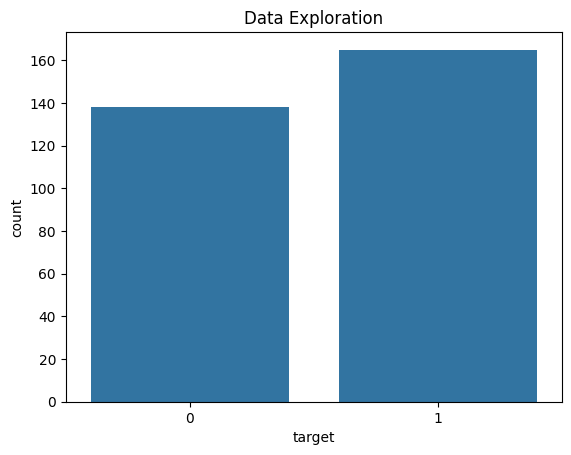

In [30]:
df.target.value_counts()
sns.countplot(x="target" , data=df)
plt.title("Data Exploration")
plt.show()

### Extracting No Disease And Have Disease

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


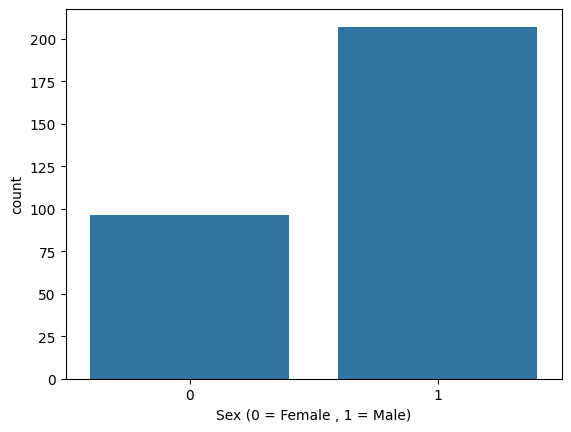

In [ ]:
countnoDiseas = len(df[df.target == 0])
counthaveDiseas = len(df[df.target == 1])

print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countnoDiseas / len(df.target)) *100))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((counthaveDiseas / len(df.target)) *100))

# Ploting data into graph
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = Female , 1 = Male)")
plt.show()